<a href="https://colab.research.google.com/github/ta7er-Alalfi/House_Price_Prediction_T7/blob/main/House_Price_Prediction_t7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pd.set_option('display.max_rows', None)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
train_url = "https://raw.githubusercontent.com/ta7er-Alalfi/T7-/refs/heads/main/house-prices-advanced-regression-techniques/train.csv"
test_url = "https://raw.githubusercontent.com/ta7er-Alalfi/T7-/refs/heads/main/house-prices-advanced-regression-techniques/test.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [ ]:
display(train_df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#عرض اخر 5 rows
display(train_df.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape : {train_df.shape}")

Train shape: (1460, 81)
Test shape : (1460, 81)


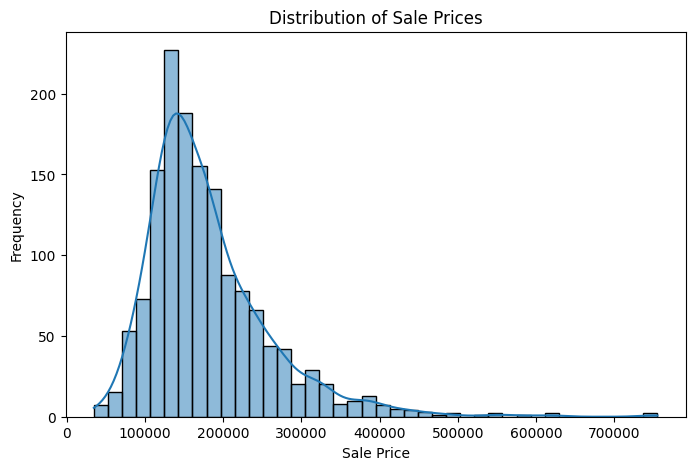

In [ ]:
#توزيع الاسعار
plt.figure(figsize=(8,5))
sns.histplot(train_df["SalePrice"], kde=True, bins=40)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()



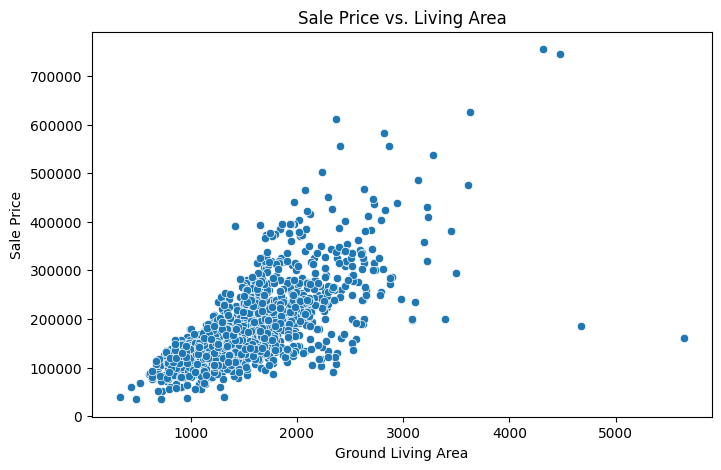

In [ ]:
#السعر مقابل المساحه
plt.figure(figsize=(8,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train_df)
plt.title("Sale Price vs. Living Area")
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.show()

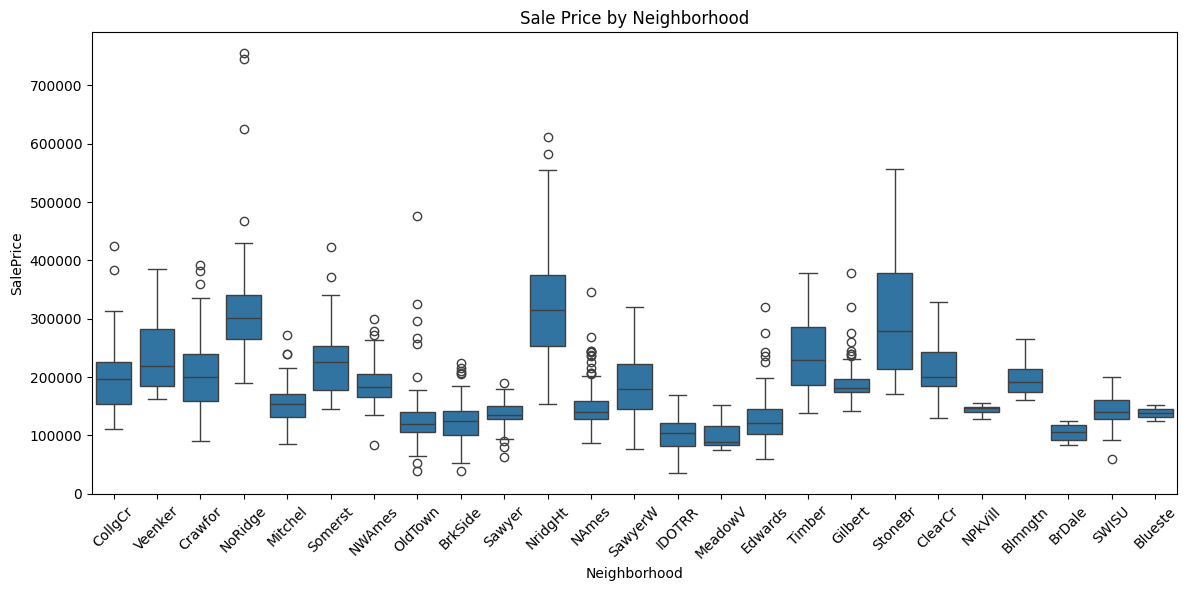

In [ ]:
#السعر حسب المكان
plt.figure(figsize=(14,6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train_df)
plt.xticks(rotation=45)
plt.title("Sale Price by Neighborhood")
plt.show()

In [ ]:
#عرض ةهmising values في كل colum
missing_train = train_df.isnull().sum().sort_values(ascending=False)
missing_test  = test_df.isnull().sum().sort_values(ascending=False)

print("Top missing values in Train:")
print(missing_train.head(10))
print("\nTop missing values in Test:")
print(missing_test.head(10))


Top missing values in Train:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64

Top missing values in Test:
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
dtype: int64


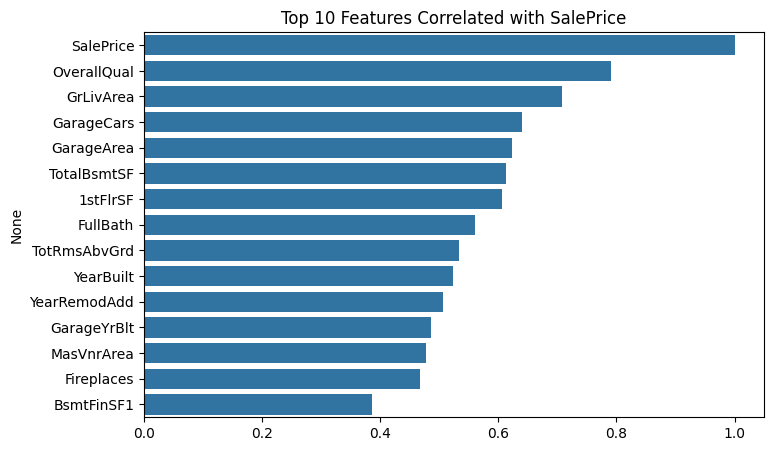

In [ ]:
numeric_df =train_df.select_dtypes(include=np.number)
corr = numeric_df.corr()
top_corr_features = corr['SalePrice'].sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index)
plt.title("Top 10 Features Correlated with SalePrice")
plt.show()

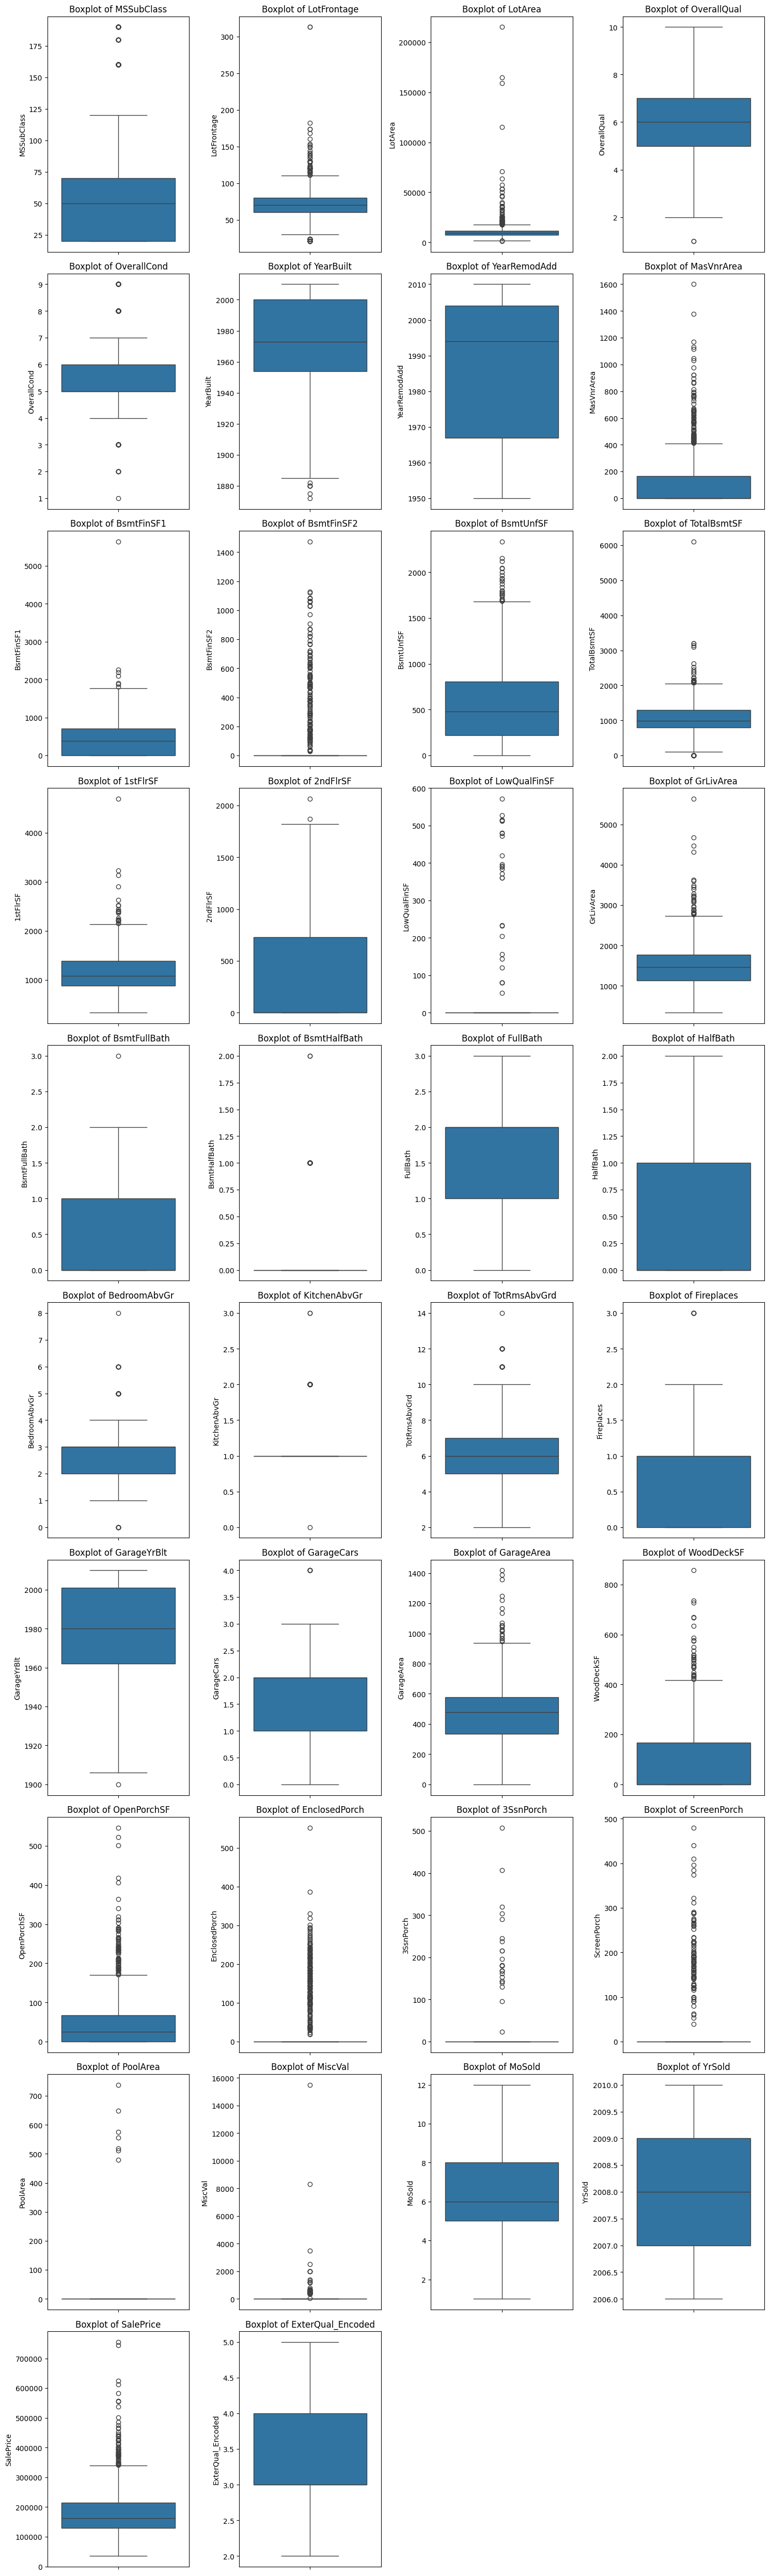

In [98]:
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns

n_features = len(numeric_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))


for i, feature in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=train_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
train_df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


In [ ]:
cat_fill_none = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu",
                 "GarageType","GarageFinish","GarageQual","GarageCond",
                 "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
for col in cat_fill_none:
    train_df[col] = train_df[col].fillna("None")
    train_df[col] = train_df[col].fillna("None")

In [ ]:
num_fill_zero = ["GarageYrBlt","GarageArea","GarageCars",
                 "BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
                 "BsmtFullBath","BsmtHalfBath","MasVnrArea"]
for col in num_fill_zero:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(0)
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(0)

In [ ]:
train_df["MasVnrType"] = train_df["MasVnrType"].fillna("None")
test_df["MasVnrType"] = test_df["MasVnrType"].fillna("None")


In [72]:
for df in [train_df, test_df]:
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median())
    )

In [73]:
for col in train_df.select_dtypes(include="object").columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
for col in test_df.select_dtypes(include="object").columns:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [74]:
for col in train_df.select_dtypes(exclude="object").columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())
for col in test_df.select_dtypes(exclude="object").columns:
    test_df[col] = test_df[col].fillna(test_df[col].median())


In [79]:
quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'NA': 0, 'None': 0}
train_df['ExterQual_Encoded'] = train_df['ExterQual'].map(quality_map)

In [84]:
numeric_corr =numeric_train_df.corr()['SalePrice'].sort_values(ascending=False)
print("Pearson Correlation:\n", numeric_corr.head(10))

Pearson Correlation:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [87]:
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(train_df['SalePrice'], train_df['ExterQual_Encoded'])
print("Spearman Correlation with ExterQual:", spearman_corr)

Spearman Correlation with ExterQual: 0.6840137963904297


In [90]:
# Select only categorical columns
categorical_cols = train_df.select_dtypes(include='object').columns

# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Calculate correlation matrix
encoded_corr = df_encoded.corr()['SalePrice'].sort_values(ascending=False)

print("Correlation after One-Hot Encoding (Top 5 features correlated with SalePrice):\n", encoded_corr.drop('SalePrice').head(5))

Correlation after One-Hot Encoding (Top 5 features correlated with SalePrice):
 OverallQual          0.790982
GrLivArea            0.708624
ExterQual_Encoded    0.682639
GarageCars           0.640409
GarageArea           0.623431
Name: SalePrice, dtype: float64


In [92]:
df_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


In [93]:
df_encoded.dtypes

,0
MSSubClass,int64
LotFrontage,float64
LotArea,int64
OverallQual,int64
OverallCond,int64
YearBuilt,int64
YearRemodAdd,int64
MasVnrArea,float64
BsmtFinSF1,int64
BsmtFinSF2,int64


In [96]:
df_encoded = df_encoded.drop_duplicates()
df_encoded.shape

(1460, 246)

In [75]:
all_data = pd.concat([train_df.drop("SalePrice", axis=1), test_df], axis=0)